<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/LLewis_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-63-6ca0b520b243>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


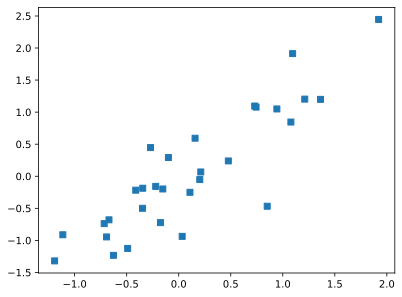

In [63]:
#Training first model in pytorch

#import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

#Step 1
#create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# now plot
plt.plot(x,y,'s')
#displays the linear relationship between x and y
plt.show()

In [64]:
#Step 2 - #build model in pytorch using the Sequential neural network function containing three argurments
ANNreg = nn.Sequential(
    nn.Linear(1,1),  #INPUT LAYER - linear input unit or node in_featrues integer, out_features integer
                     #(1 one input x value, 1 one out passed to the other nn.Linear(1, as its input))
    nn.ReLU(),       #ACTIVATION FUNCTION
    nn.Linear(1,1)   #OUTPUT LAYER  linear output unit or node
                    # (1, 1 this number  one is the final and only one output which is the y value)
)
#variable that contains the model
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)


output from ANNreg model variable, shows the
sequence for linear -> activation func -> linear
Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)



In [62]:
#Step 3 - #Now setup meta parameters for the training model
#Learning rate
learningRate = .05

#  Mean Square Error - MSE loss function
lossfun = nn.MSELoss()

#optimizer (the flavor of stacastic gradient descent to implememt)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

#Step 4 - Now train the model
numepochs = 500
losses = torch.zeros(numepochs)


for epochi in range(numepochs): #number of iterations 500

  #forward pass
  yHat = ANNreg(x)  #pass the observed data x into the deep learning model
                    #the final output of the model ANNreg - this prediction from the model is stored in yHat

  #compute loss
  loss = lossfun(yHat, y) #enter predicted value and y observed value and calculate the MSE Mean Square Error
                           #MSE is the squared difference between the predicted data point and the observed data point y
  losses[epochi] = loss  #storing each loss in an array for each epoch as it loops to visualize losses over training epochs

  #backpropagation or backprop
  optimizer.zero_grad()   #set all the derivatives in the model to be zero
  loss.backward()         #computes the backpropagation based on the loss from the MSE lossfun(yHat, y)
  optimizer.step()

AttributeError: ignored

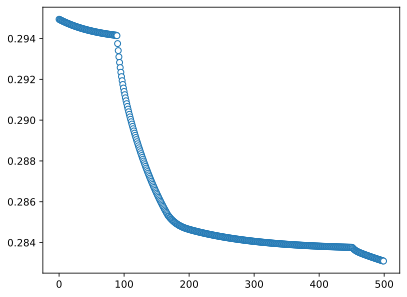

In [67]:
#Step 5 Now Show the losses

#Manually commpute losses
#Run a Final Forward pass or Forward propagation
predictions = ANNreg(x)

#Run my own Final loss (MSE)
#subtract the prediction from the observed data y , square , then take the average (mean)
# over all the squared differences
testloss = (predictions-y).pow(2).mean


plt.plot(losses.detach(),'o', markerfacecolor='w',linewidth=.1)
plt.plot(numepochs, testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()



When training models I want the Loss function y axis to go down over the training epochs on the x axis, as it does in the graph above the Final loss title is = 0.160316.   The loss is small, so the model is done.   200 epochs may have been sufficient.

testloss.detach()  - removes the word gradient
testloss.item()  shows loss value

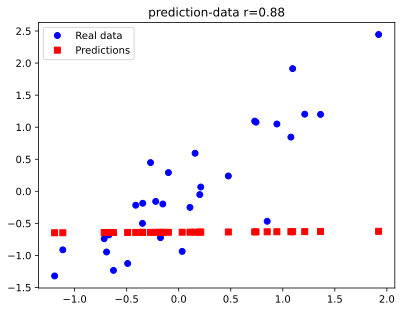

In [75]:
#plost the data  - see how the model actually performs
# data in blue, predic

plt.plot(x,y, 'bo', label='Real data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()
#predicting the correlation coeifficient between the observed data y.T and the predictions.T
#here 0.88 is the correlation between the observed data and the prediction